In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.graphics.factorplots import interaction_plot

from scipy import stats
import pingouin as pg 

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv')
# df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/ToothGrowth.csv', index_col=0)

(array([ 2.,  3.,  5.,  6., 14., 12., 11.,  4.,  5.,  2.]),
 array([ 90.91878836,  93.32628977,  95.73379119,  98.1412926 ,
        100.54879402, 102.95629544, 105.36379685, 107.77129827,
        110.17879968, 112.5863011 , 114.99380252]),
 <a list of 10 Patch objects>)

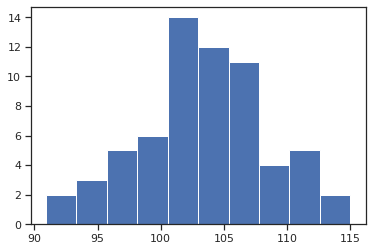

In [3]:
plt.hist(df.expr)

In [4]:
stats.shapiro(df.expr)

(0.9897744059562683, 0.8766552805900574)

In [5]:
g1 = df[(df.age.isin([1])) & (df.dose.isin(['D1']))]
g2 = df[(df.age.isin([1])) & (df.dose.isin(['D2']))]
g3 = df[(df.age.isin([2])) & (df.dose.isin(['D1']))]
g4 = df[(df.age.isin([2])) & (df.dose.isin(['D2']))]
ga = [(g1, "G1"), (g2, "G2"), (g3, "G3"), (g4, "G4")]

In [6]:
for i, name in ga:
    print(f"Stat for {name}:\nmean = {i.expr.mean()},\nSD = {i.expr.std()}")
print(stats.levene(df[(df.age.isin([1])) & (df.dose.isin(['D1']))].expr, 
                   df[(df.age.isin([1])) & (df.dose.isin(['D2']))].expr, 
                   df[(df.age.isin([2])) & (df.dose.isin(['D1']))].expr, 
                   df[(df.age.isin([2])) & (df.dose.isin(['D2']))].expr))

Stat for G1:
mean = 104.758464076568,
SD = 5.863453521054207
Stat for G2:
mean = 105.5458643045101,
SD = 4.369024138263366
Stat for G3:
mean = 101.00480486634189,
SD = 5.116310343506722
Stat for G4:
mean = 102.27362937036307,
SD = 5.135374468159471
LeveneResult(statistic=0.28003102634798455, pvalue=0.8395982852704241)


In [7]:
pg.anova(dv='expr', between=['age', 'dose'], data=df, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,age,197.453,1,197.453,7.449850,0.008313,0.110450
1,dose,16.912,1,16.912,0.638085,0.427556,0.010523
2,age * dose,0.927,1,0.927,0.034978,0.852272,0.000583
3,Residual,1590.257,60,26.504,NaN,NaN,NaN


In [8]:
df.columns

Index(['expr', 'age', 'dose'], dtype='object')

In [9]:
formula = 'expr ~ C(age) + C(dose) + C(age):C(dose)'

In [10]:
model = ols(formula, df).fit()

In [11]:
table = anova_lm(model, typ=2)

In [12]:
table.round(4)

,sum_sq,df,F,PR(>F)
C(age),197.4528,1.0,7.4498,0.0083
C(dose),16.9122,1.0,0.6381,0.4276
C(age):C(dose),0.9271,1.0,0.0350,0.8523
Residual,1590.2574,60.0,NaN,NaN


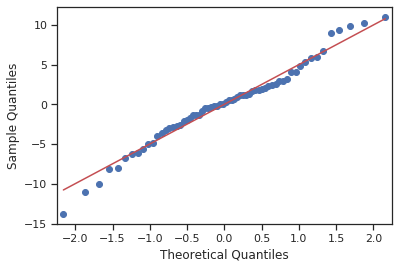

In [13]:
res = model.resid
fig = sm.qqplot(res, line='s')

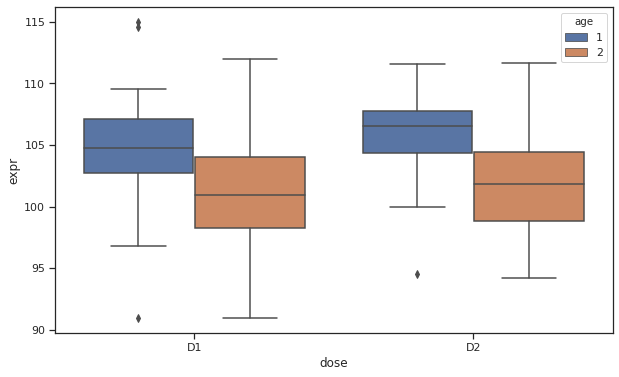

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='dose', y='expr', data=df, hue='age')

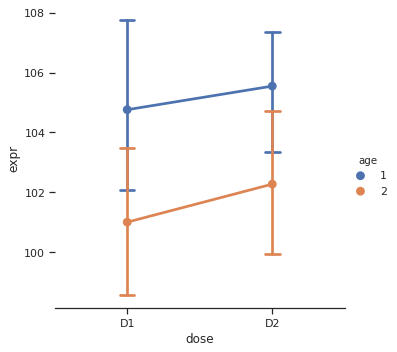

In [15]:
t = sns.catplot(x='dose', y='expr', data=df, hue='age', capsize=.1, kind='point')
t.despine(left=True)

In [16]:
mc = MultiComparison(df.expr, df.dose,)

In [17]:
print(mc.tukeyhsd())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    D1     D2   1.0281 0.4468 -1.6561 3.7123  False
---------------------------------------------------


In [18]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/9250/birds.csv')

In [19]:
df.columns

Index(['var4', 'hormone', 'sex'], dtype='object')

(array([ 4., 11.,  5., 13., 15.,  8.,  3.,  3.,  1.,  1.]),
 array([12.45267904, 14.06936342, 15.68604779, 17.30273216, 18.91941654,
        20.53610091, 22.15278529, 23.76946966, 25.38615403, 27.00283841,
        28.61952278]),
 <a list of 10 Patch objects>)

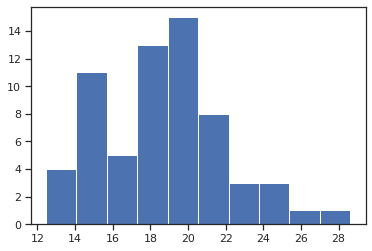

In [20]:
plt.hist(df.var4)

In [21]:
pg.anova(dv='var4', between=['hormone', 'sex'], data=df, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,hormone,0.847,1,0.847,0.086480,0.769716,0.001439
1,sex,0.120,1,0.120,0.012252,0.912232,0.000204
2,hormone * sex,89.484,1,89.484,9.136414,0.003682,0.132151
3,Residual,587.650,60,9.794,NaN,NaN,NaN


In [22]:
formula = 'var4 ~ C(hormone) + C(sex) + C(hormone):C(sex)'
model = ols(formula, df).fit()
table = anova_lm(model, typ=2)
table.round(4)

,sum_sq,df,F,PR(>F)
C(hormone),0.8475,1.0,0.0865,0.7697
C(sex),0.1198,1.0,0.0122,0.9123
C(hormone):C(sex),89.4834,1.0,9.1364,0.0037
Residual,587.6504,60.0,NaN,NaN


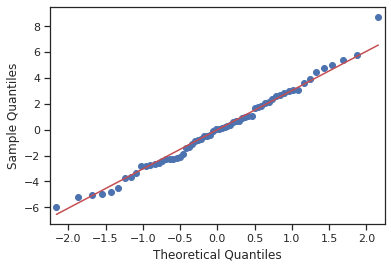

In [23]:
res = model.resid
fig = sm.qqplot(res, line='s')

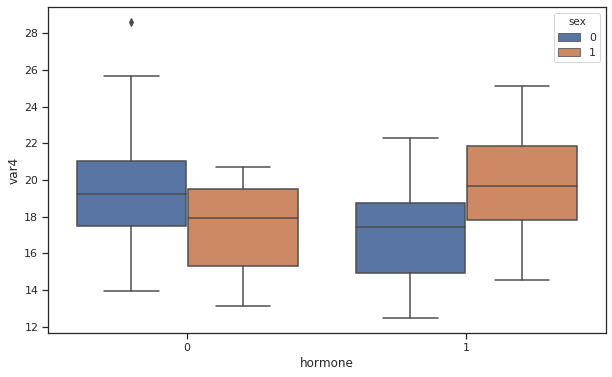

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hormone', y='var4', data=df, hue='sex')

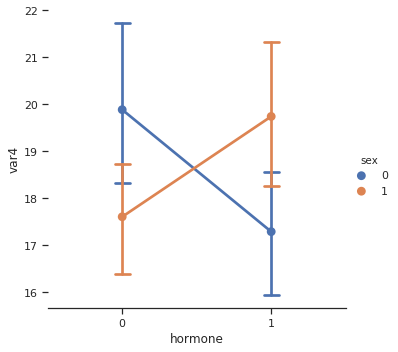

In [25]:
t = sns.catplot(x='hormone', y='var4', data=df, hue='sex', capsize=.1, kind='point')
t.despine(left=True)